<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:Mohammad Ghafourian

**Student ID**:99106493

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
train_data = np.load('q2-train.npy')
X_train = train_data[:, 0]
Y_train = train_data[:, 1]

val_data = np.load('q2-valid.npy')
X_val = val_data[:, 0]
Y_val = val_data[:, 1]

test_data = np.load('q2-test.npy')
X_test = test_data[:, 0]
Y_test = test_data[:, 1]

### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [3]:
def create_matrix(X,k):
  '''
  X: an m by 1 array 
  '''
  new_X = None
  ### START CODE HERE ###
  m = X.shape[0]
  new_X = np.zeros((m, k+1))
  for i in range(k+1):
      new_X[:, i] = X[:] ** i
  ### END CODE HERE ###
  return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [4]:
# If you need any other function for training write it here
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###
  wTx = np.dot(X, w)
  loss = np.sum(np.square(wTx - Y)) / (2*m)
  ### END CODE HERE ###
  return loss

def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  ### START CODE HERE ###
  X_transpose = np.transpose(X)
  w = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y
  ### END CODE HERE ###
  return w
# (like gradient descent or anything else)

In [5]:
def train(X_train, Y_train, X_val, Y_val, k):
  '''
  X_train: an m_train by 1 vector contains training points
  Y_train: an m_train by 1 vector contains training values
  X_val: an m_val by 1 vector contains validation points
  Y_val: an m_val by 1 vector contains validation values
  k: degree of polynomial
  '''
  w, loss_train, loss_val = None, None, None
  ### START CODE HERE ###
  X_train = create_matrix(X_train,k)
  X_val = create_matrix(X_val ,k )
  w =direct_method(X_train,Y_train)
  loss_train = loss(X_train,Y_train,w)
  loss_val = loss(X_val , Y_val ,w)
  ### END CODE HERE ###
  return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: with increasing k our train loss decrease but because of overfitting increases the valid loss.

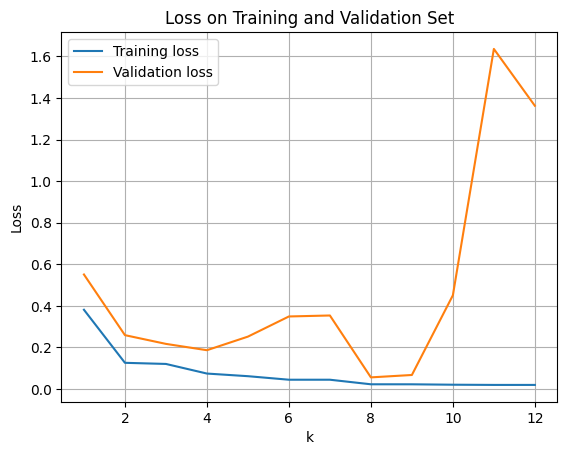

In [6]:
### START CODE HERE ###
k_list =[x+1 for x in range(12)]
losses_train =[]
losses_valid =[]
w_list = []
for k in k_list:
  w, loss_train,loss_valid = train(X_train,Y_train,X_val,Y_val,k);
  losses_train.append(loss_train)
  losses_valid.append(loss_valid)
  w_list.append(w)

plt.plot(k_list, losses_train, label='Training loss')
plt.plot(k_list, losses_valid, label='Validation loss')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Loss on Training and Validation Set')
plt.legend()
plt.grid()
plt.show()
#print(w_list)
### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**:

In [7]:
### START CODE HERE ###
# in k=8 we can see the best valid loss from training
newX_Test = create_matrix(X_test,k=8)
test_loss = loss(newX_Test,Y_test,w_list[7])
print("test loss is for k = 8: ",test_loss)
print("train loss is for k = 8: ",losses_train[7])
print("valid loss is for k = 8: ",losses_valid[7])
newX_Test = create_matrix(X_test,k=12)
test_loss = loss(newX_Test,Y_test,w_list[11])
print("test loss is for k = 12: ",test_loss)
print("train loss is for k = 12: ",losses_train[11])
print("valid loss is for k = 12: ",losses_valid[11])
### END CODE HERE ###

test loss is for k = 8:  0.05895712398604512
train loss is for k = 8:  0.022410565463804755
valid loss is for k = 8:  0.05564659584368912
test loss is for k = 12:  0.3046347951102929
train loss is for k = 12:  0.01934431263211123
valid loss is for k = 12:  1.3623235500399813
